In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Placements.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,package
0,0,6.89,3.26
1,1,5.12,1.98
2,2,7.82,3.25
3,3,7.42,3.67
4,4,6.94,3.57


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

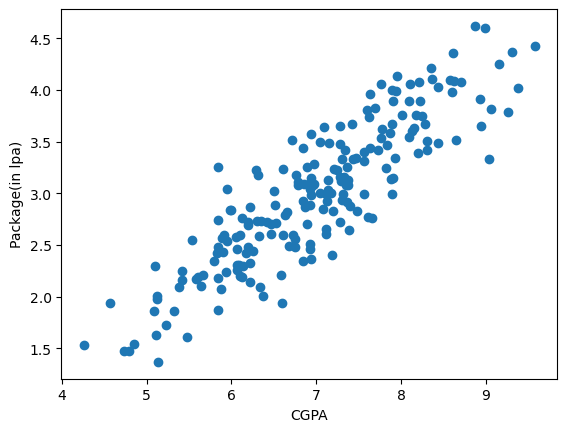

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

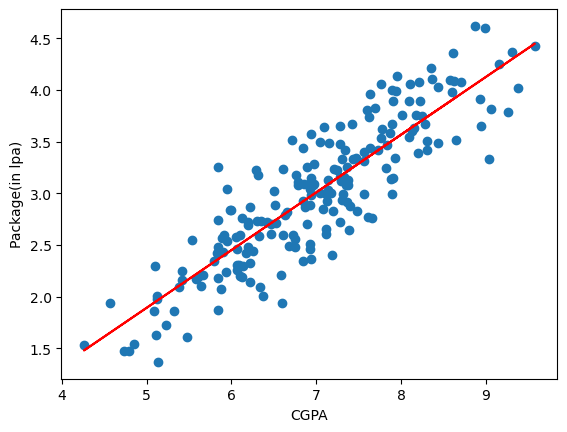

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [25]:
print("MAE",mean_absolute_error(y_test,y_pred)) #in terms of LPA

MAE 0.2884710931878175


In [26]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [28]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [29]:
print("R2",r2_score(y_test,y_pred))

R2 0.780730147510384


In [30]:
#Adjusted R2 Score

In [31]:
r2 = r2_score(y_test,y_pred)

In [32]:
X_test.shape

(40, 1)

In [33]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [34]:
#Comparing R2 score and Adjusted R2 score on random data column as input

In [38]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.082032,3.26
1,5.12,0.686295,1.98
2,7.82,0.100723,3.25
3,7.42,0.225493,3.67
4,6.94,0.340252,3.57


Text(0, 0.5, 'Package(in lpa)')

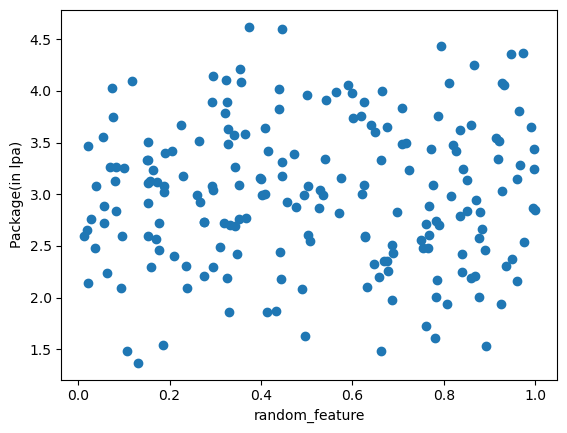

In [40]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [42]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
lr = LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7718862497272352


In [49]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7595557767395182

In [50]:
#Comparing R2 score and Adjusted R2 score on valid data column as input

In [52]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [53]:
new_df2.sample(5)

,cgpa,iq,package
167,8.13,3.90,3.60
88,4.73,0.38,1.48
97,5.98,3.24,2.84
189,8.11,3.76,4.06
150,6.30,3.13,2.73


Text(0, 0.5, 'package(in lpa)')

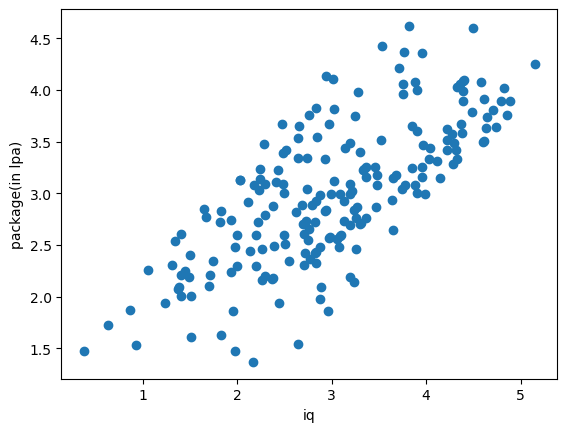

In [54]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [55]:
np.random.randint(-100,100)

50

In [56]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [60]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8321766612613883


In [61]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8231051294376797